<a href="https://colab.research.google.com/github/Krishnaprasad0705/Brainwave_Matrix_Intern/blob/main/Copy_of_Task_2_Sentiment_Analysis_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

from google.colab import files
uploaded = files.upload()


Saving synthetic_social_media_data.csv to synthetic_social_media_data.csv


In [ ]:
import pandas as pd

df = pd.read_csv('synthetic_social_media_data.csv')
df.head()


,Post ID,Post Content,Sentiment Label,Number of Likes,Number of Shares,Number of Comments,User Follower Count,Post Date and Time,Post Type,Language
0,aa391375-7355-44b7-bcbf-97fb4e5a2ba3,Word who nor center everything better politica...,Neutral,157,243,64,4921,2024-01-10 00:14:21,video,fr
1,1c9ec98d-437a-48d9-9cba-bd5ad853c59a,Begin administration population good president...,Positive,166,49,121,612,2024-02-03 00:20:11,image,es
2,170e5b5b-1d9a-4d02-a957-93c4dbb18908,Thousand total sign. Agree product relationshi...,Positive,185,224,179,9441,2024-07-25 14:20:23,video,de
3,aec53496-60ee-4a06-8821-093a04dc8770,Individual from news third. Oil forget them di...,Neutral,851,369,39,6251,2024-02-20 09:15:09,text,de
4,4eacddb7-990d-4056-8784-7e1d5c4d1404,Time adult letter see reduce. Attention sudden...,Negative,709,356,52,1285,2024-03-01 04:17:35,image,de


In [ ]:

import pandas as pd

df = pd.read_csv('Train.csv')
df.head()

,Id,Body,Sentiment Type
0,1,rule 2 no metes about polarizing political top...,neutral
1,2,NaN,neutral
2,3,no politics danger now i can make a propaganda...,negative
3,4,i am the senate gets stabbed,neutral
4,5,is this a suicide,neutral


In [ ]:

import pandas as pd

df = pd.read_csv('Test.csv')
df.head()

,Id,Body
0,1,rule 2 no metes about polarizing political top...
1,2,NaN
2,3,no politics danger now i can make a propaganda...
3,4,i am the senate gets stabbed
4,5,is this a suicide


In [ ]:
import pandas as pd

df_train = pd.read_csv('Train.csv')
df_train.head()
df_train.columns

Index(['Id', 'Body', 'Sentiment Type'], dtype='object')

In [ ]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import seaborn as sns
import matplotlib.pyplot as plt

nltk.download('stopwords')
nltk.download('vader_lexicon')

df_train = pd.read_csv('Train.csv')

stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = re.sub(r"http\S+|@\w+|#[A-Za-z0-9_]+", '', str(text))
    text = re.sub(r"[^a-zA-Z\s]", '', text.lower())
    return ' '.join([word for word in text.split() if word not in stop_words])

df_train['clean_text'] = df_train['Body'].apply(clean_text)

sid = SentimentIntensityAnalyzer()
df_train['compound'] = df_train['clean_text'].apply(lambda x: sid.polarity_scores(x)['compound'])

df_train['predicted_sentiment'] = df_train['compound'].apply(
    lambda x: 'Positive' if x > 0.05 else ('Negative' if x < -0.05 else 'Neutral')
)

df_train[['Body', 'Sentiment Type', 'predicted_sentiment']].head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


,Body,Sentiment Type,predicted_sentiment
0,rule 2 no metes about polarizing political top...,neutral,Negative
1,NaN,neutral,Neutral
2,no politics danger now i can make a propaganda...,negative,Negative
3,i am the senate gets stabbed,neutral,Negative
4,is this a suicide,neutral,Negative


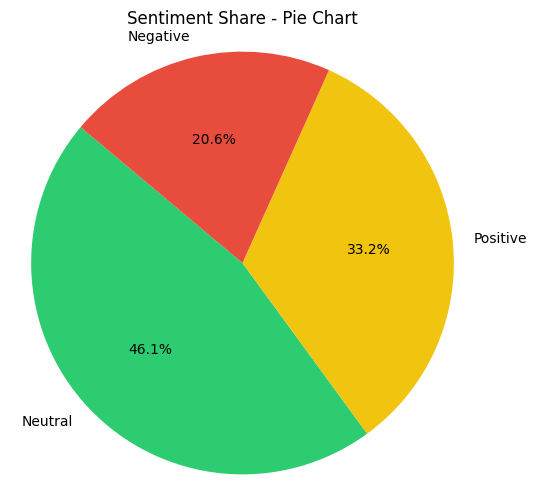

In [ ]:

import matplotlib.pyplot as plt

sentiment_counts = df_train['predicted_sentiment'].value_counts()

colors = ['#2ecc71', '#f1c40f', '#e74c3c']

plt.figure(figsize=(6, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title("Sentiment Share - Pie Chart")
plt.axis('equal')
plt.show()


In [ ]:
df_test = pd.read_csv('Test.csv')
df_test['clean_text'] = df_test['Body'].apply(clean_text)
df_test['compound'] = df_test['clean_text'].apply(lambda x: sid.polarity_scores(x)['compound'])
df_test['predicted_sentiment'] = df_test['compound'].apply(
    lambda x: 'Positive' if x > 0.05 else ('Negative' if x < -0.05 else 'Neutral')
)
df_test[['Body', 'predicted_sentiment']].head()

,Body,predicted_sentiment
0,rule 2 no metes about polarizing political top...,Negative
1,NaN,Neutral
2,no politics danger now i can make a propaganda...,Negative
3,i am the senate gets stabbed,Negative
4,is this a suicide,Negative


In [ ]:

df_test = df_test.dropna(subset=['Body'])

In [ ]:
df_test.to_csv('test_with_predictions.csv', index=False)

/tmp/ipython-input-3036255416.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='predicted_sentiment', data=df_test, palette=colors)


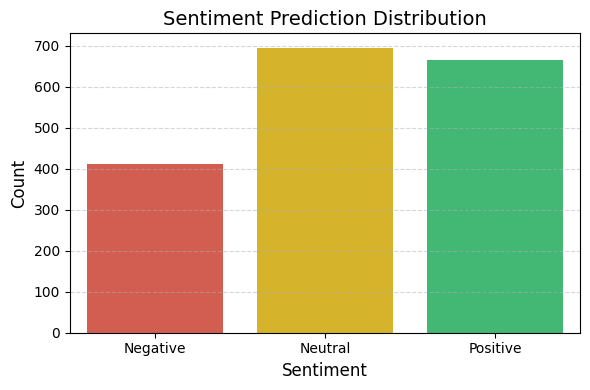

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt

colors = {
    'Positive': '#2ecc71',
    'Neutral': '#f1c40f',
    'Negative': '#e74c3c'
}

plt.figure(figsize=(6, 4))
sns.countplot(x='predicted_sentiment', data=df_test, palette=colors)
plt.title("Sentiment Prediction Distribution", fontsize=14)
plt.xlabel("Sentiment", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()